## 4 Gradient Descent Algorithm with Linear Regression


This is to demosntrate that we could use the gradient descent algorithm to do some work in linear regression

Again here we are using the Pima Diabete dataset, and I would like to see the relationship between the blood pressure and glucose. The very basic question is, would an increase in the blood pressure associated with a higher blood glucose? This would be a question that fits to be answered by linear regression. And we are gonna use gradient descent to carry out linear regression.

1. Import the Pima Diabete Data

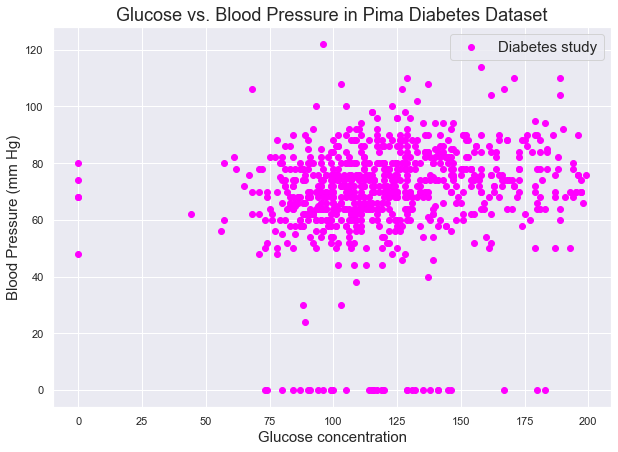

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

# Load the Pima Diabetes dataset
df = pd.read_csv("Datasets/diabetes.csv")

# Visualizing the relationship between 'Glucose' and 'Blood Pressure'
plt.figure(figsize=(10, 7))
plt.scatter(df['Glucose'], 
            df['BloodPressure'], 
            color="magenta",  # Using magenta color
            label="Diabetes study")
plt.xlabel("Glucose concentration", fontsize=15)
plt.ylabel("Blood Pressure (mm Hg)", fontsize=15)
plt.legend(fontsize=15)
plt.title("Glucose vs. Blood Pressure in Pima Diabetes Dataset", fontsize=18)
plt.show()


You could observe that there are some errors in some data such that people have 0 blood pressure and 0 Glucose in the blood. That's impossible. For simplicity, we just remove the  datapoints that either it's 0 Blood pressure or 0 Glucose concentration. Here is the code to do so and we plot it again.

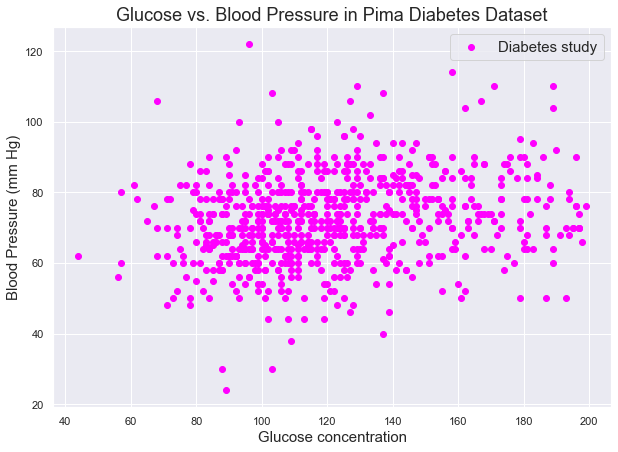

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()


# Remove rows where 'Glucose' or 'BloodPressure' are zero
df = df[(df['Glucose'] != 0) & (df['BloodPressure'] != 0)]

# Visualizing the relationship between 'Glucose' and 'Blood Pressure'
plt.figure(figsize=(10, 7))
plt.scatter(df['Glucose'], 
            df['BloodPressure'], 
            color="magenta",  # Using magenta color
            label="Diabetes study")
plt.xlabel("Glucose concentration", fontsize=15)
plt.ylabel("Blood Pressure (mm Hg)", fontsize=15)
plt.legend(fontsize=15)
plt.title("Glucose vs. Blood Pressure in Pima Diabetes Dataset", fontsize=18)
plt.show()


### 4.2.1 Understanding Single Neuron for Linear Regression

In machine learning, we can use a single neuron, also called a perceptron, to perform linear regression. Linear regression is like finding the best line that fits our data. Imagine you have a bunch of points on a graph, and you want to draw a straight line that is as close as possible to all these points. That's what linear regression does.

Our neuron has something called weights, which are like settings that it adjusts to get this line right. The intercept (often represented as `b`) is where the line crosses the Y-axis, and the slope (usually the letter `m`) is how steep the line is.

The code below represents a simplified neuron that can learn from data to find the best line. We make it learn by showing it examples (our data points), and it keeps adjusting the weights (changing the line) until it gets as close as possible to an ideal fit.

The 'train' function in the code helps our neuron learn from the data, while the 'predict' function uses what the neuron has learned to make predictions or, in our case, to tell us where on the line a new point would be.

We added two new functions `get_slope` and `get_intercept` so you can easily see the slope and intercept after the neuron has been trained. The slope tells you how much y increases for a one-unit increase in x, and the intercept is where the line crosses the y-axis.

Now, let's see how we can modify the code.



Here is the single neuron that we use to make the prediction

In [12]:
import numpy as np

class SingleNeuron(object):
    def __init__(self, activation_function):
        self.activation_function = activation_function
        self.w_ = None
        self.errors_ = []

    def train(self, X, y, alpha=0.005, epochs=50):
        # Add a column of ones to X to account for the bias term (bias trick)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        self.w_ = np.random.rand(X_bias.shape[1])  # Initialize weights including bias
        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X_bias, y):
                output = self.predict(xi)  # xi already includes the bias
                error = output - target
                self.w_ -= alpha * error * xi
                errors += 0.5 * (error ** 2)
            self.errors_.append(errors / len(X_bias))
        return self

    def predict(self, X):
        # Ensure that the input X is ready for multiplication with weights
        if X.ndim == 1:
            # If X is a single sample, make sure it is the correct length
            X = np.insert(X, 0, 1) if len(X) == self.w_.size - 1 else X
        elif X.ndim == 2 and X.shape[1] == self.w_.size - 1:
            # If X is a matrix of samples without the bias, add it
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        return self.activation_function(np.dot(X, self.w_))

    # Function to return the slope of the line
    def get_slope(self):
        # Assuming the weight of the first feature (after the bias) is the slope
        return self.w_[1]

    # Function to return the intercept of the line
    def get_intercept(self):
        # The weight for the bias term is the intercept
        return self.w_[0]


Before we feed our data to the single neuron, we need to first modify our data.

In [13]:
# Assuming 'df' is your DataFrame containing the Pima Diabetes dataset
X = df['Glucose'].values.reshape(-1, 1)
y = df['BloodPressure'].values

# Optional: Display the shapes of X and y to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (728, 1)
Shape of y: (728,)


Defining the activation function and then start training:

In [14]:
def linear_activation(z):
    return z

# Create a neuron with a linear activation function
node = SingleNeuron(linear_activation)

# Train the model
node.train(X, y, alpha=0.0001, epochs=1000)

# Print the training errors to evaluate
print("Training errors over epochs:", node.errors_)

Training errors over epochs: [3648.7949499359947, 3626.9936150008252, 3605.6358206497357, 3584.4384837565, 3563.4003649703704, 3542.5202346563256, 3521.7968728183546, 3501.2290690232594, 3480.8156223251876, 3460.555341190621, 3440.4470434240584, 3420.489556094272, 3400.681715461092, 3381.022366902838, 3361.5103648443173, 3342.144572685347, 3322.923862729889, 3303.847116115742, 3284.9132227447476, 3266.1210812136305, 3247.469598745301, 3228.9576911207546, 3210.584282611506, 3192.3483059125465, 3174.2487020758103, 3156.2844204442526, 3138.454418586342, 3120.7576622311435, 3103.1931252038958, 3085.7597893621014, 3068.45664453211, 3051.28268844624, 3034.2369266803425, 3017.3183725919225, 3000.5260472587115, 2983.8589794177133, 2967.316205404788, 2950.8967690946815, 2934.599721841511, 2918.4241224197367, 2902.3690369656574, 2886.433538919269, 2870.6167089666474, 2854.9176349827885, 2839.335411974883, 2823.869142026044, 2808.5179342394836, 2793.280904683124, 2778.157176334669, 2763.145879027

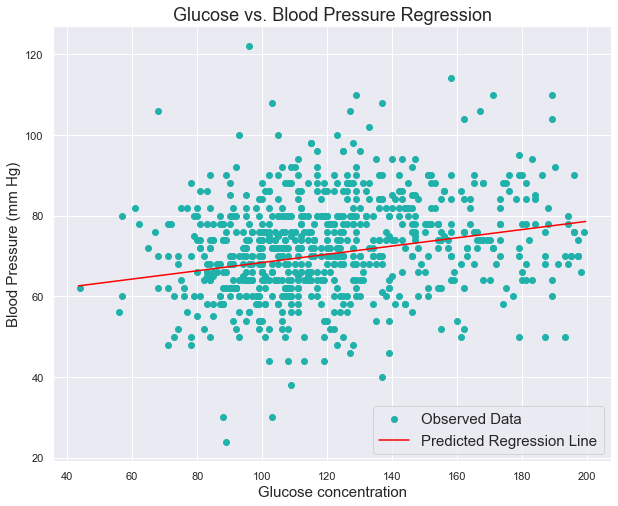

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Create a domain of glucose values for prediction
domain = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5, 100)

plt.figure(figsize=(10, 8))
plt.scatter(X, y, color="lightseagreen", label="Observed Data")
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color="red", label="Predicted Regression Line")
plt.xlabel("Glucose concentration", fontsize=15)
plt.ylabel("Blood Pressure (mm Hg)", fontsize=15)
plt.title("Glucose vs. Blood Pressure Regression", fontsize=18)
plt.legend(fontsize=15)
plt.show()


For your curiousity, you would like to see what the slope and the intercept is.

In [16]:
# Print out the slope and intercept
print("Slope (weight of the feature):", node.get_slope())
print("Intercept (bias term):", node.get_intercept())


Slope (weight of the feature): 0.10230910683599645
Intercept (bias term): 58.13685071978205


And plot the errors

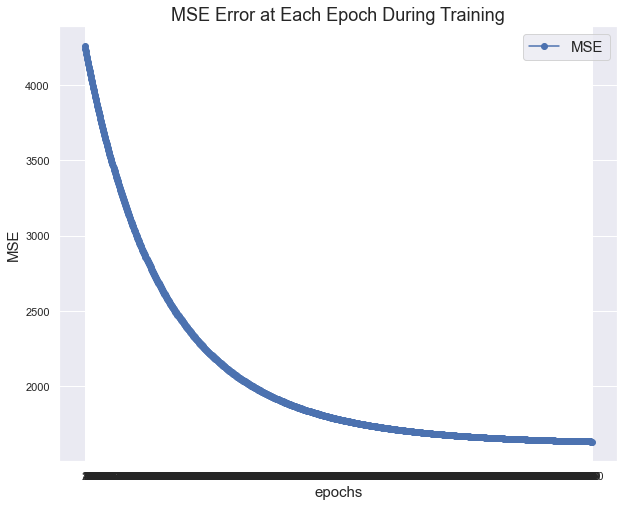

In [23]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

### 4.2.1 Compared our result with OLS

We are curious to see how this single neuro perform compared to the OLS. Here is the OLS. (I prefer statsmodel instead of sci-kitlearn because of my background in economics)

In [17]:
import statsmodels.api as sm

# Add a column of ones to X to account for the intercept term when using statsmodels
X_with_intercept = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X_with_intercept).fit()

# Print out the summary of the OLS model which includes the slope and intercept
print(ols_model.summary())

# Now print out the Single Neuron's parameters
print("Single Neuron Slope:", node.get_slope())
print("Single Neuron Intercept:", node.get_intercept())

# You can also directly print out the OLS parameters
print("OLS Slope:", ols_model.params[1])
print("OLS Intercept:", ols_model.params[0])


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     38.06
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           1.14e-09
Time:                        17:36:04   Log-Likelihood:                -2846.0
No. Observations:                 728   AIC:                             5696.
Df Residuals:                     726   BIC:                             5705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.4563      1.836     33.482      0.0

We notice that there is a difference between our result and the true OLS. when comparing the results of a Single Neuron model trained using gradient descent with those of an Ordinary Least Squares (OLS) regression, several factors can contribute to differences in the slope and intercept values:

1. **Learning Rate and Epochs**: The learning rate and the number of iterations (epochs) are crucial for gradient descent. If these are not set appropriately, the model may not converge to the best solution.

2. **Initialization**: The Single Neuron's weights are initially set to random values. Different starting points can lead to different results as gradient descent might converge to different local minima.

3. **Data Scaling**: Gradient descent is sensitive to the scale of the data. If the input features are not scaled, it can affect the convergence speed and the final solution. OLS is not affected by scaling.

4. **Precision**: OLS regression has an analytical solution, which is exact, while gradient descent approximates the solution through iteration. This can lead to differences in precision.

5. **Regularization**: If regularization is used in the OLS model, it would also cause differences because regularization changes the optimization problem to prefer smaller coefficients.

6. **Algorithmic Differences**: OLS uses a closed-form solution involving linear algebra, while gradient descent is an optimization algorithm that iteratively updates the weights to minimize the cost function.

These factors can all influence the final parameters of a model. To minimize discrepancies, ensure proper tuning of the learning rate, sufficient epochs, correct initialization, and appropriate data preprocessing.

By modifing our training parameters like alpha and epochs, could we improve? 

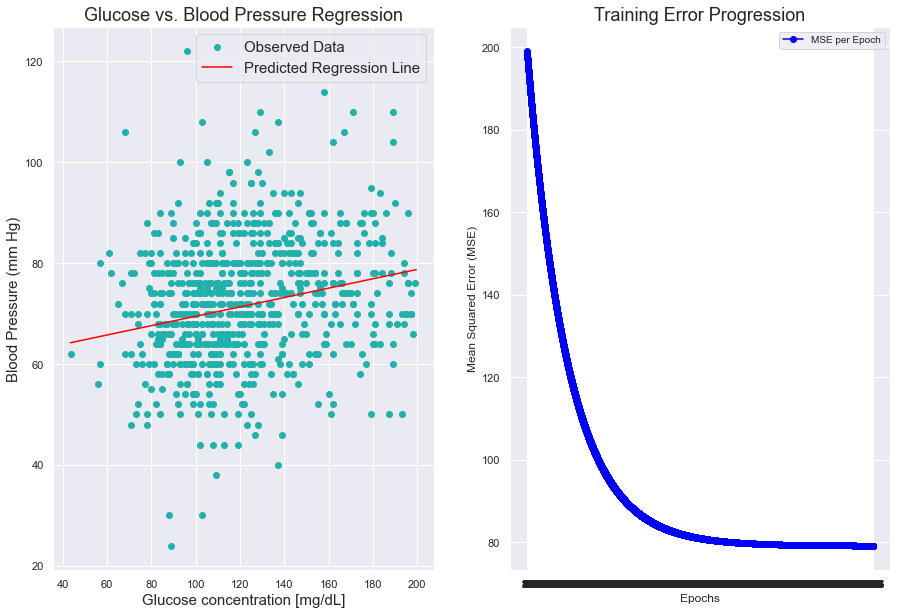

In [18]:
import matplotlib.pyplot as plt

# Assume node has already been defined and trained
node = SingleNeuron(linear_activation)
node.train(X, y, alpha=0.00001, epochs=10_000)

# Creating a domain for glucose values to be used in predictions
domain = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5, 100)

# Setting up a subplot with 2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Plotting the relationship between Glucose and Blood Pressure
ax1.scatter(X, y, color="lightseagreen", label="Observed Data")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)), color="red", label="Predicted Regression Line")
ax1.set_xlabel("Glucose concentration [mg/dL]", fontsize=15)
ax1.set_ylabel("Blood Pressure (mm Hg)", fontsize=15)
ax1.set_title("Glucose vs. Blood Pressure Regression", fontsize=18)
ax1.legend(fontsize=15)

# Plotting the Mean Squared Error over each epoch
ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker="o",
         linestyle="-",
         color="blue",
         label="MSE per Epoch")
ax2.set_xlabel("Epochs", fontsize=12)
ax2.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))  # Setting x-axis ticks
ax2.legend(fontsize=10)
ax2.set_title("Training Error Progression", fontsize=18)

plt.show()

In [19]:
print("Single Neuron Slope:", node.get_slope())
print("Single Neuron Intercept:", node.get_intercept())

Single Neuron Slope: 0.0929517648885629
Single Neuron Intercept: 60.18167701525498


The errors have become smaller!